In [1]:
import utils
import config
import model
from tensorflow import keras
from tensorflow.keras.callbacks import LearningRateScheduler
from keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt
import numpy as np

path = 'C:/Users/hml76/Desktop/Jupyter/Paper1__renew/BandMyo/BandMyo_data'  
Num_sensor = 8
Num_gesture = 8
Num_labels = 15

data_processor = utils.data_processing(Num_sensor, Num_labels, Num_gesture)
#Min_length = data_processor.normalize_sampling(path)
EMG_dataframe = data_processor.build_data(path)
Node_feature, X_train, y_train, X_test, y_test = data_processor.data_split(EMG_dataframe, ratio=0.8)

Train data shape: (22381, 151)
Test data shape: (5507, 151)


In [2]:
graph_generator = config.Graph_BandMyo(EMG_dataframe, Num_sensor)

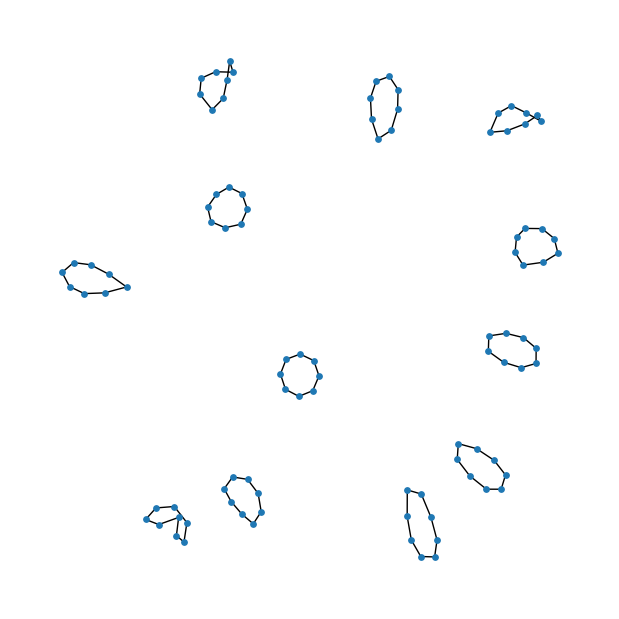

In [3]:
knn1_graph, edges, edge_weights = graph_generator.KNN1()
graph_generator.draw_graph(knn1_graph[:96])

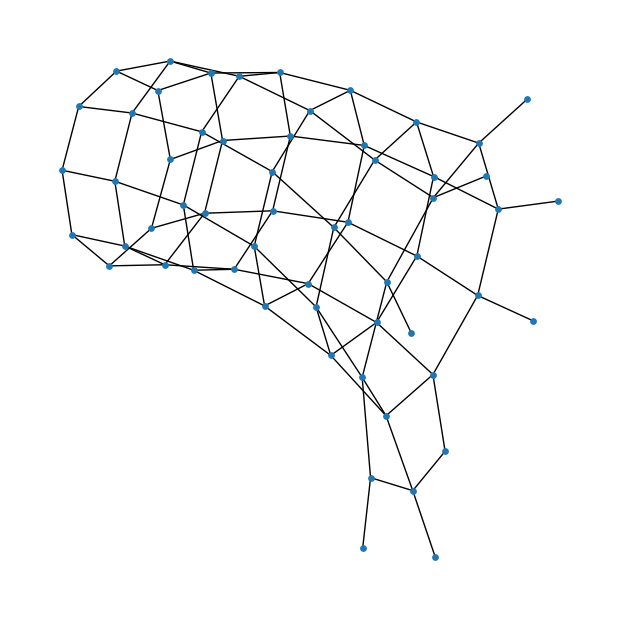

In [4]:
graph_, edges, edge_weights = graph_generator.KNN1_SW()
graph_generator.draw_graph(graph_[:100])

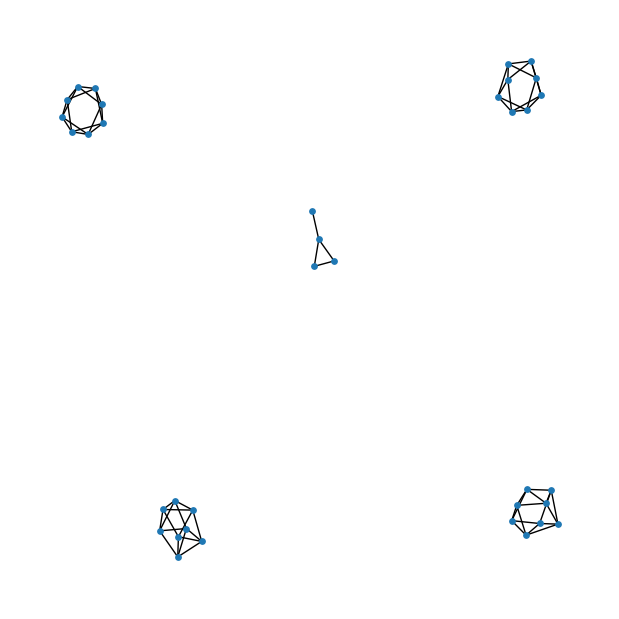

In [5]:
graph_, edges, edge_weights = graph_generator.KNN2()
graph_generator.draw_graph(graph_[:100])

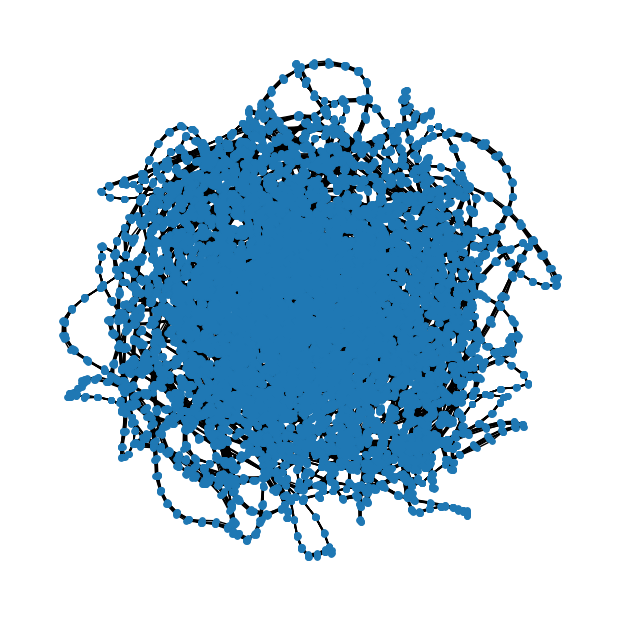

In [7]:
graph_, edges, edge_weights = graph_generator.KNN2_SW()
graph_generator.draw_graph(graph_)

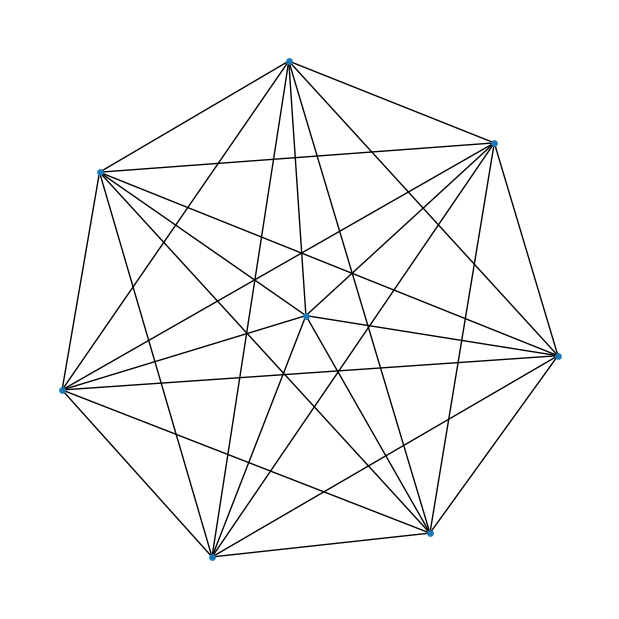

In [11]:
graph_, edges, edge_weights = graph_generator.FC()
graph_generator.draw_graph(graph_[:28])

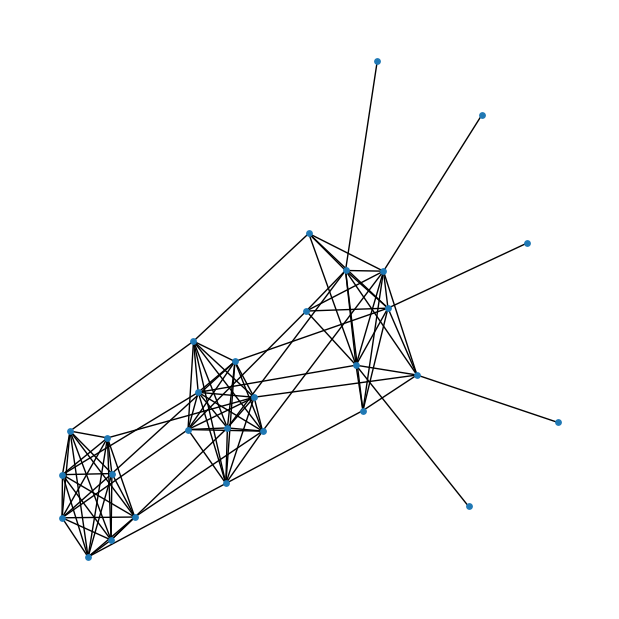

In [9]:
graph_, edges, edge_weights = graph_generator.FC_SW()
graph_generator.draw_graph(graph_[:100])

In [4]:
hidden_units = [256, 256]
learning_rate = 0.01
dropout_rate = 0.15
num_epochs = 150
batch_size = 64

num_classes = 15
lr_scheduler = LearningRateScheduler(model.step_decay, verbose=1)

# K-Nearest Neighbor Graph structure (K=1)

In [6]:
graph_, edges, edge_weights = graph_generator.KNN1()
graph_metadata = (Node_feature, edges, edge_weights) 

GCN = model.GNNNodeClassifier(
    graph_info=graph_metadata,
    num_classes=num_classes,
    hidden_units=hidden_units,
    dropout_rate=dropout_rate,
    name="GCN_KNN1",
)

GCN.compile(
    optimizer=keras.optimizers.Adam(learning_rate),
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=[keras.metrics.SparseCategoricalAccuracy(name="acc")],
)

history = GCN.fit(
    x=X_train,
    y=y_train,
    epochs=num_epochs,
    batch_size=batch_size,
    validation_data=(X_test, y_test),
    callbacks=[lr_scheduler],
)


Epoch 1: LearningRateScheduler setting learning rate to 0.01.
Epoch 1/150
350/350 [==============================] - 42s 108ms/step - loss: 2.7237 - acc: 0.1000 - val_loss: 2.6671 - val_acc: 0.0819 - lr: 0.0100

Epoch 2: LearningRateScheduler setting learning rate to 0.01.
Epoch 2/150
350/350 [==============================] - 38s 109ms/step - loss: 2.5916 - acc: 0.1214 - val_loss: 2.6319 - val_acc: 0.1017 - lr: 0.0100

Epoch 3: LearningRateScheduler setting learning rate to 0.01.
Epoch 3/150
350/350 [==============================] - 39s 112ms/step - loss: 2.5503 - acc: 0.1287 - val_loss: 2.5684 - val_acc: 0.1271 - lr: 0.0100

Epoch 4: LearningRateScheduler setting learning rate to 0.01.
Epoch 4/150
350/350 [==============================] - 37s 107ms/step - loss: 2.5180 - acc: 0.1419 - val_loss: 2.4963 - val_acc: 0.1425 - lr: 0.0100

Epoch 5: LearningRateScheduler setting learning rate to 0.01.
Epoch 5/150
350/350 [==============================] - 38s 109ms/step - loss: 2.4830 - ac

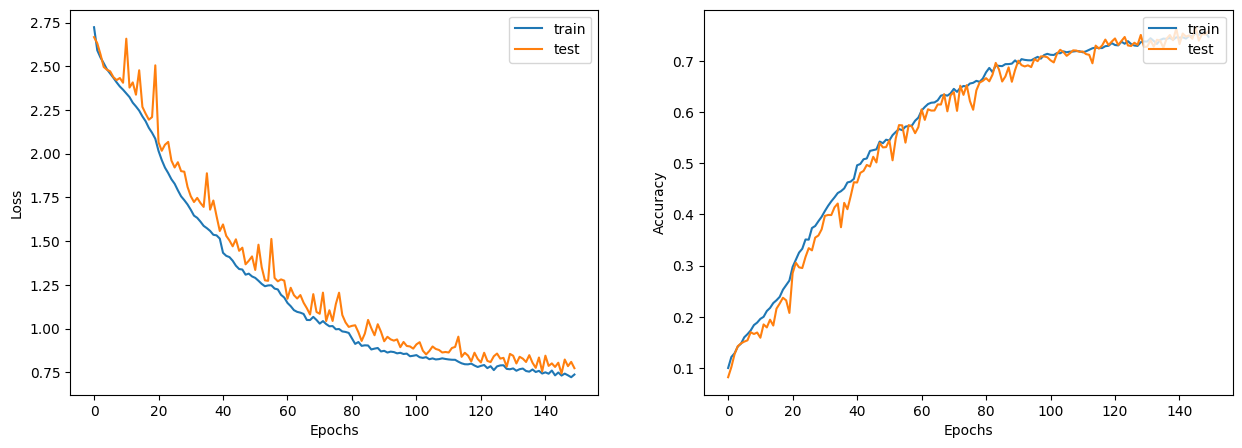

Maximum val accuracy : 76.575 %


In [15]:
utils.display_learning_curves(history)
print("Maximum val accuracy :", np.round(max(history.history['val_acc'])*100, 3), '%')

# K-Nearest Neighbor + Sensor-wise connection Graph structure (K=1)

In [19]:
graph_, edges, edge_weights = graph_generator.KNN1_SW()
graph_metadata = (Node_feature, edges, edge_weights) 

GCN = model.GNNNodeClassifier(
    graph_info=graph_metadata,
    num_classes=num_classes,
    hidden_units=hidden_units,
    dropout_rate=dropout_rate,
    name="GCN_KNN1_SW",
)

GCN.compile(
    optimizer=keras.optimizers.Adam(learning_rate),
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=[keras.metrics.SparseCategoricalAccuracy(name="acc")],
)

history = GCN.fit(
    x=X_train,
    y=y_train,
    epochs=200,
    batch_size=batch_size,
    validation_data=(X_test, y_test),
    callbacks=[lr_scheduler],
)


Epoch 1: LearningRateScheduler setting learning rate to 0.01.
Epoch 1/200
350/350 [==============================] - 49s 131ms/step - loss: 2.7279 - acc: 0.1019 - val_loss: 2.6470 - val_acc: 0.0959 - lr: 0.0100

Epoch 2: LearningRateScheduler setting learning rate to 0.01.
Epoch 2/200
350/350 [==============================] - 47s 135ms/step - loss: 2.5922 - acc: 0.1210 - val_loss: 2.7119 - val_acc: 0.0701 - lr: 0.0100

Epoch 3: LearningRateScheduler setting learning rate to 0.01.
Epoch 3/200
350/350 [==============================] - 48s 137ms/step - loss: 2.5365 - acc: 0.1353 - val_loss: 2.5977 - val_acc: 0.1146 - lr: 0.0100

Epoch 4: LearningRateScheduler setting learning rate to 0.01.
Epoch 4/200
350/350 [==============================] - 49s 140ms/step - loss: 2.4563 - acc: 0.1529 - val_loss: 2.3886 - val_acc: 0.1770 - lr: 0.0100

Epoch 5: LearningRateScheduler setting learning rate to 0.01.
Epoch 5/200
350/350 [==============================] - 48s 138ms/step - loss: 2.3563 - ac

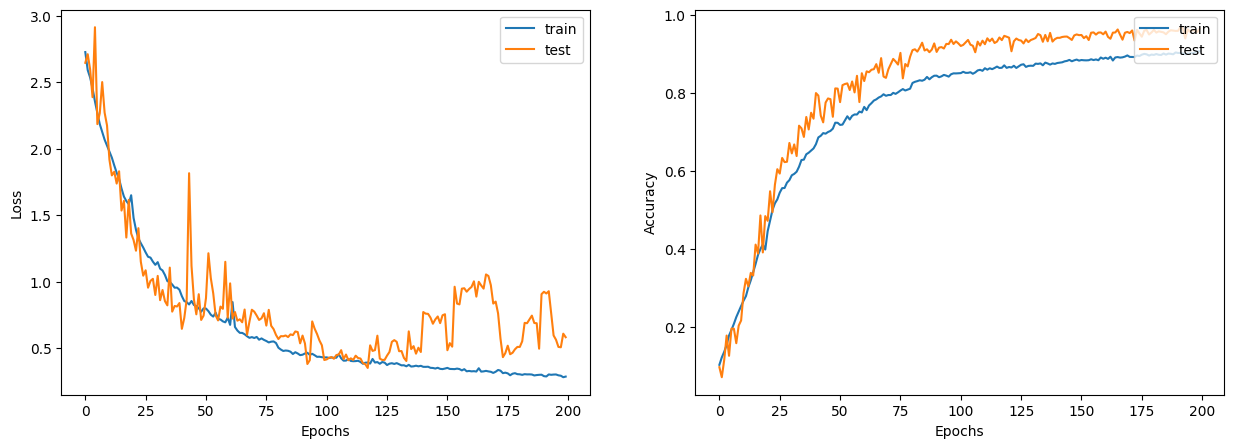

Maximum val accuracy : 96.859 %


In [20]:
utils.display_learning_curves(history)
print("Maximum val accuracy :", np.round(max(history.history['val_acc'])*100, 3), '%')

# K-Nearest Neighbor Graph structure (K=2)

In [21]:
graph_, edges, edge_weights = graph_generator.KNN2()
graph_metadata = (Node_feature, edges, edge_weights) 

GCN = model.GNNNodeClassifier(
    graph_info=graph_metadata,
    num_classes=num_classes,
    hidden_units=hidden_units,
    dropout_rate=dropout_rate,
    name="GCN_KNN2",
)

GCN.compile(
    optimizer=keras.optimizers.Adam(learning_rate),
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=[keras.metrics.SparseCategoricalAccuracy(name="acc")],
)

history = GCN.fit(
    x=X_train,
    y=y_train,
    epochs=200,
    batch_size=batch_size,
    validation_data=(X_test, y_test),
    #callbacks=[lr_scheduler],
)

Epoch 1/200
350/350 [==============================] - 59s 161ms/step - loss: 2.6589 - acc: 0.1154 - val_loss: 2.5951 - val_acc: 0.1030
Epoch 2/200
350/350 [==============================] - 60s 171ms/step - loss: 2.4094 - acc: 0.1533 - val_loss: 2.4624 - val_acc: 0.1502
Epoch 3/200
350/350 [==============================] - 60s 172ms/step - loss: 2.3005 - acc: 0.1873 - val_loss: 2.3000 - val_acc: 0.1921
Epoch 4/200
350/350 [==============================] - 61s 173ms/step - loss: 2.1533 - acc: 0.2243 - val_loss: 2.1311 - val_acc: 0.2312
Epoch 5/200
350/350 [==============================] - 59s 169ms/step - loss: 2.0147 - acc: 0.2683 - val_loss: 1.9007 - val_acc: 0.2853
Epoch 6/200
350/350 [==============================] - 60s 172ms/step - loss: 1.9008 - acc: 0.3058 - val_loss: 1.8610 - val_acc: 0.3140
Epoch 7/200
350/350 [==============================] - 60s 170ms/step - loss: 1.8069 - acc: 0.3373 - val_loss: 1.7077 - val_acc: 0.3730
Epoch 8/200
350/350 [===========================

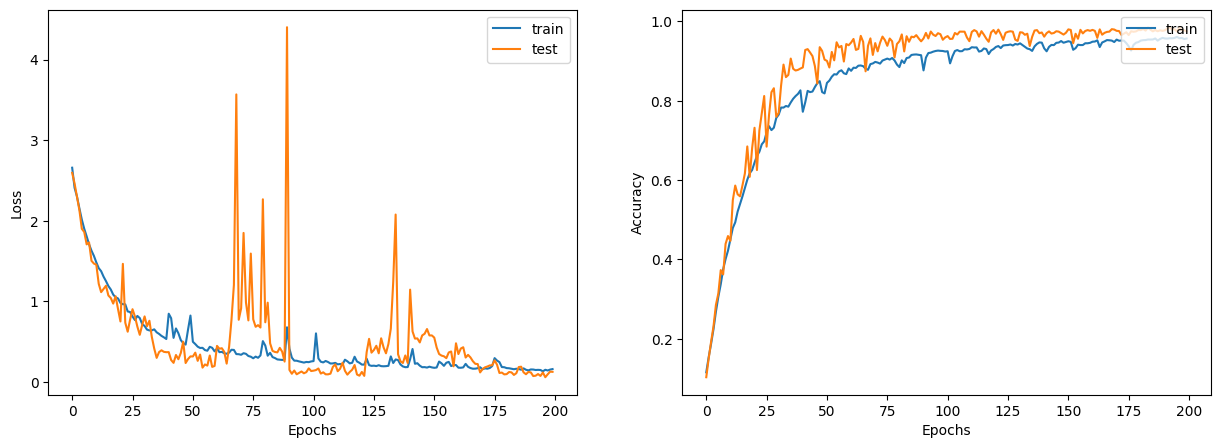

Maximum val accuracy : 98.529 %


In [22]:
utils.display_learning_curves(history)
print("Maximum val accuracy :", np.round(max(history.history['val_acc'])*100, 3), '%')

# K-Nearest Neighbor + Sensor-wise connection Graph structure (K=2)

In [23]:
graph_, edges, edge_weights = graph_generator.KNN2_SW()
graph_metadata = (Node_feature, edges, edge_weights) 

GCN = model.GNNNodeClassifier(
    graph_info=graph_metadata,
    num_classes=num_classes,
    hidden_units=hidden_units,
    dropout_rate=dropout_rate,
    name="GCN_KNN2_SW",
)

GCN.compile(
    optimizer=keras.optimizers.Adam(learning_rate),
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=[keras.metrics.SparseCategoricalAccuracy(name="acc")],
)

history = GCN.fit(
    x=X_train,
    y=y_train,
    epochs=150,
    batch_size=batch_size,
    validation_data=(X_test, y_test),
    #callbacks=[lr_scheduler],
)

Epoch 1/150
350/350 [==============================] - 65s 178ms/step - loss: 2.6840 - acc: 0.1070 - val_loss: 2.6477 - val_acc: 0.0952
Epoch 2/150
350/350 [==============================] - 64s 183ms/step - loss: 2.3932 - acc: 0.1592 - val_loss: 2.7562 - val_acc: 0.0895
Epoch 3/150
350/350 [==============================] - 68s 194ms/step - loss: 2.2351 - acc: 0.1966 - val_loss: 2.7111 - val_acc: 0.1376
Epoch 4/150
350/350 [==============================] - 69s 197ms/step - loss: 2.0588 - acc: 0.2434 - val_loss: 1.9379 - val_acc: 0.2633
Epoch 5/150
350/350 [==============================] - 69s 196ms/step - loss: 1.8911 - acc: 0.2961 - val_loss: 1.7744 - val_acc: 0.3252
Epoch 6/150
350/350 [==============================] - 72s 205ms/step - loss: 1.7488 - acc: 0.3267 - val_loss: 1.6157 - val_acc: 0.3496
Epoch 7/150
350/350 [==============================] - 71s 204ms/step - loss: 1.6510 - acc: 0.3683 - val_loss: 1.5542 - val_acc: 0.3831
Epoch 8/150
350/350 [===========================

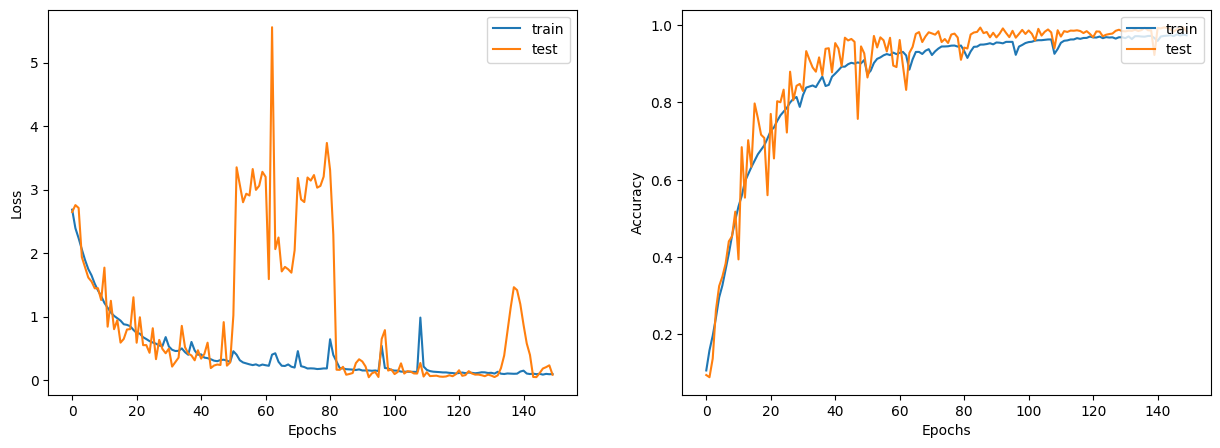

Maximum val accuracy : 99.419 %


In [25]:
utils.display_learning_curves(history)
print("Maximum val accuracy :", np.round(max(history.history['val_acc'])*100, 3), '%')

# Fully-connected Graph structure

In [27]:
graph_, edges, edge_weights = graph_generator.FC()
graph_metadata = (Node_feature, edges, edge_weights) 

GCN = model.GNNNodeClassifier(
    graph_info=graph_metadata,
    num_classes=num_classes,
    hidden_units=hidden_units,
    dropout_rate=dropout_rate,
    name="GCN_FC",
)

GCN.compile(
    optimizer=keras.optimizers.Adam(learning_rate),
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=[keras.metrics.SparseCategoricalAccuracy(name="acc")],
)

history = GCN.fit(
    x=X_train,
    y=y_train,
    epochs=150,
    batch_size=batch_size,
    validation_data=(X_test, y_test),
    callbacks=[lr_scheduler],
)


Epoch 1: LearningRateScheduler setting learning rate to 0.01.
Epoch 1/150
350/350 [==============================] - 62s 167ms/step - loss: 2.6422 - acc: 0.1152 - val_loss: 2.6222 - val_acc: 0.1082 - lr: 0.0100

Epoch 2: LearningRateScheduler setting learning rate to 0.01.
Epoch 2/150
350/350 [==============================] - 61s 174ms/step - loss: 2.3693 - acc: 0.1552 - val_loss: 2.5392 - val_acc: 0.1264 - lr: 0.0100

Epoch 3: LearningRateScheduler setting learning rate to 0.01.
Epoch 3/150
350/350 [==============================] - 64s 184ms/step - loss: 2.2562 - acc: 0.1866 - val_loss: 2.1869 - val_acc: 0.2059 - lr: 0.0100

Epoch 4: LearningRateScheduler setting learning rate to 0.01.
Epoch 4/150
350/350 [==============================] - 64s 184ms/step - loss: 2.1418 - acc: 0.2221 - val_loss: 2.0657 - val_acc: 0.2388 - lr: 0.0100

Epoch 5: LearningRateScheduler setting learning rate to 0.01.
Epoch 5/150
350/350 [==============================] - 65s 187ms/step - loss: 2.0311 - ac

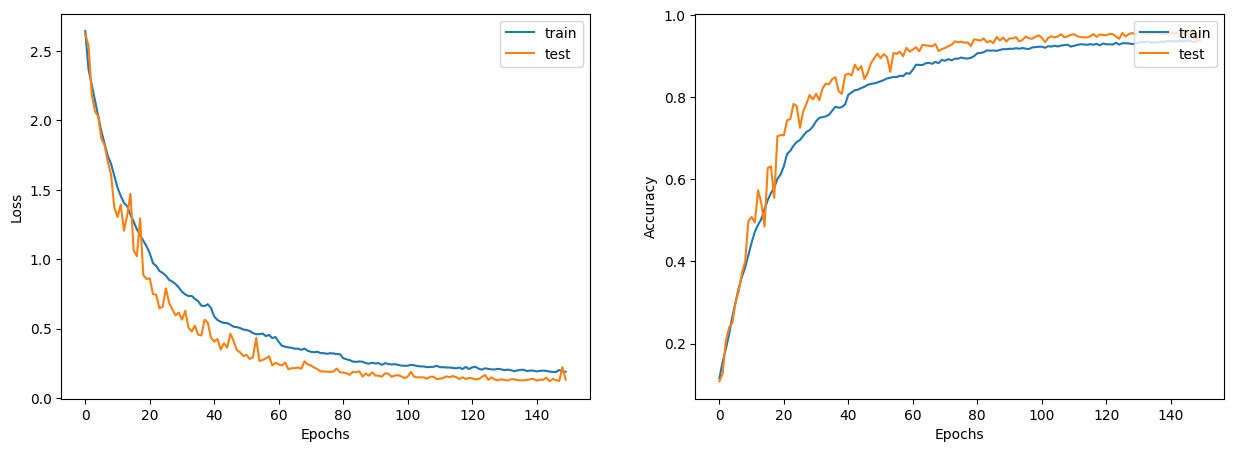

Maximum val accuracy : 96.06 %


In [28]:
utils.display_learning_curves(history)
print("Maximum val accuracy :", np.round(max(history.history['val_acc'])*100, 3), '%')

# Fully-connected + Sensor-wise connection Graph structure

In [29]:
graph_, edges, edge_weights = graph_generator.FC_SW()
graph_metadata = (Node_feature, edges, edge_weights) 

GCN = model.GNNNodeClassifier(
    graph_info=graph_metadata,
    num_classes=num_classes,
    hidden_units=hidden_units,
    dropout_rate=dropout_rate,
    name="GCN_FC",
)

GCN.compile(
    optimizer=keras.optimizers.Adam(learning_rate),
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=[keras.metrics.SparseCategoricalAccuracy(name="acc")],
)

history = GCN.fit(
    x=X_train,
    y=y_train,
    epochs=200,
    batch_size=batch_size,
    validation_data=(X_test, y_test),
    callbacks=[lr_scheduler],
)

Epoch 1/200
350/350 [==============================] - 78s 202ms/step - loss: 2.6666 - acc: 0.1135 - val_loss: 2.7178 - val_acc: 0.0790
Epoch 2/200
350/350 [==============================] - 77s 221ms/step - loss: 2.3320 - acc: 0.1596 - val_loss: 2.5090 - val_acc: 0.1257
Epoch 3/200
350/350 [==============================] - 76s 218ms/step - loss: 2.1817 - acc: 0.1904 - val_loss: 2.0693 - val_acc: 0.2048
Epoch 4/200
350/350 [==============================] - 76s 218ms/step - loss: 2.0423 - acc: 0.2282 - val_loss: 1.9126 - val_acc: 0.2629
Epoch 5/200
350/350 [==============================] - 76s 218ms/step - loss: 1.8945 - acc: 0.2830 - val_loss: 1.7272 - val_acc: 0.3539
Epoch 6/200
350/350 [==============================] - 77s 221ms/step - loss: 1.7570 - acc: 0.3432 - val_loss: 1.6342 - val_acc: 0.3915
Epoch 7/200
350/350 [==============================] - 78s 222ms/step - loss: 1.6229 - acc: 0.3935 - val_loss: 1.5975 - val_acc: 0.3879
Epoch 8/200
350/350 [===========================

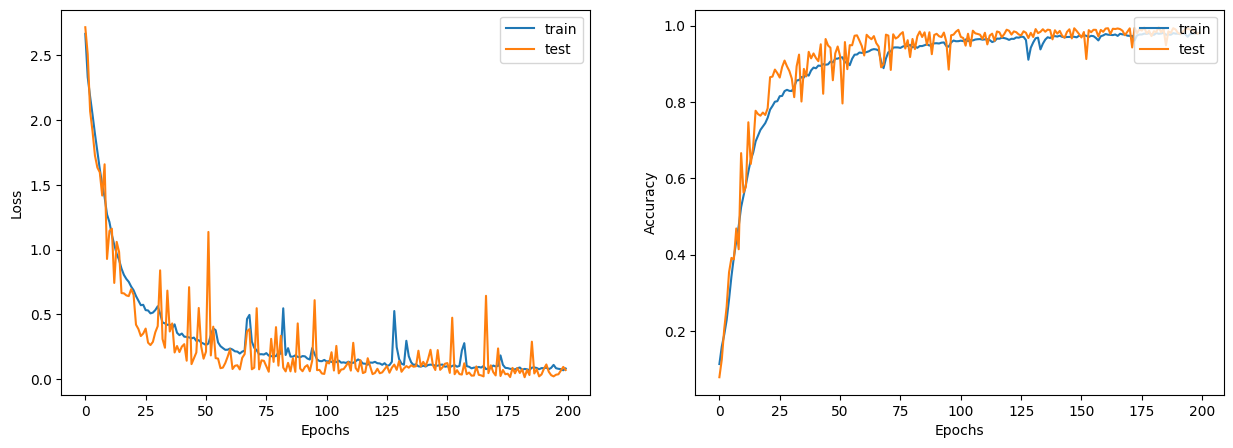

Maximum val accuracy : 99.582 %


In [30]:
utils.display_learning_curves(history)
print("Maximum val accuracy :", np.round(max(history.history['val_acc'])*100, 3), '%')